# PRJ - Authors et al.

Article link: []().

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA772783"
# Choosing lineages with several observations with high abundance
lineages_in_paper <- c("BA.5", "BA.2.12.1", "BA.2.29", "BA.2", "BA.1", "BA.1.1.18")


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
coco$date <- dplyr::if_else(
    stringr::str_count(coco$date, "-") == 1,
    paste0(coco$date, "-15"),
    coco$date
)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1002,+1003.C,ins:1003:1,0,0,0,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
2,1093,+1094.T,ins:1094:1,0,0,0,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
3,11440,+11441.G,ins:11441:1,0,1,0,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
4,11890,+11891.G,ins:11891:1,0,0,0,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
5,12234,+12235.C,ins:12235:1,0,0,0,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
6,12886,+12887.GTT,ins:12887:3,0,0,0,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"


In [3]:
dplyr::if_else(stringr::str_count(coco$date, "-") == 1, paste0(coco$date, "-15"), coco$date) |> table()



2020-11-20 2021-01-01 2021-03-11 2021-06-20 2021-11-15 2021-12-15 2022-01-15 
      3031       3031       3031       3031      12124      18186      15155 
2022-02-15 2022-03-15 2022-04-15 2022-05-15 2022-06-15 2022-07-15 2022-08-15 
     15155      15155      30310      48496      51527      42434      48496 
2022-09-15 2022-10-15 2022-11-15 
     63651      42434      21217 

In [4]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  6 92

In [5]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


Warning message in rep(10, length = nrow(lineage_defs)):
"first element used of 'length.out' argument"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"
Warning message in rep(10, length = nrow(lineage_defs)):
"first element used of 'length.out' argument"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"


   user  system elapsed 
 10.135   0.361  10.605 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,2.326609e-04,NA,NA,BA.2.12.1,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
2,4.250645e-02,NA,NA,BA.2.29,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
3,1.501603e-02,NA,NA,BA.2,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
4,3.347848e-05,NA,NA,BA.5,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
5,3.068146e-04,NA,NA,BA.1.1.18,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"
6,6.133642e-05,NA,NA,BA.1,SRR16491250,2020-11-20,"Washoe-November, 2020",152,385695440,PRJNA772783,Washoe,"300,000"


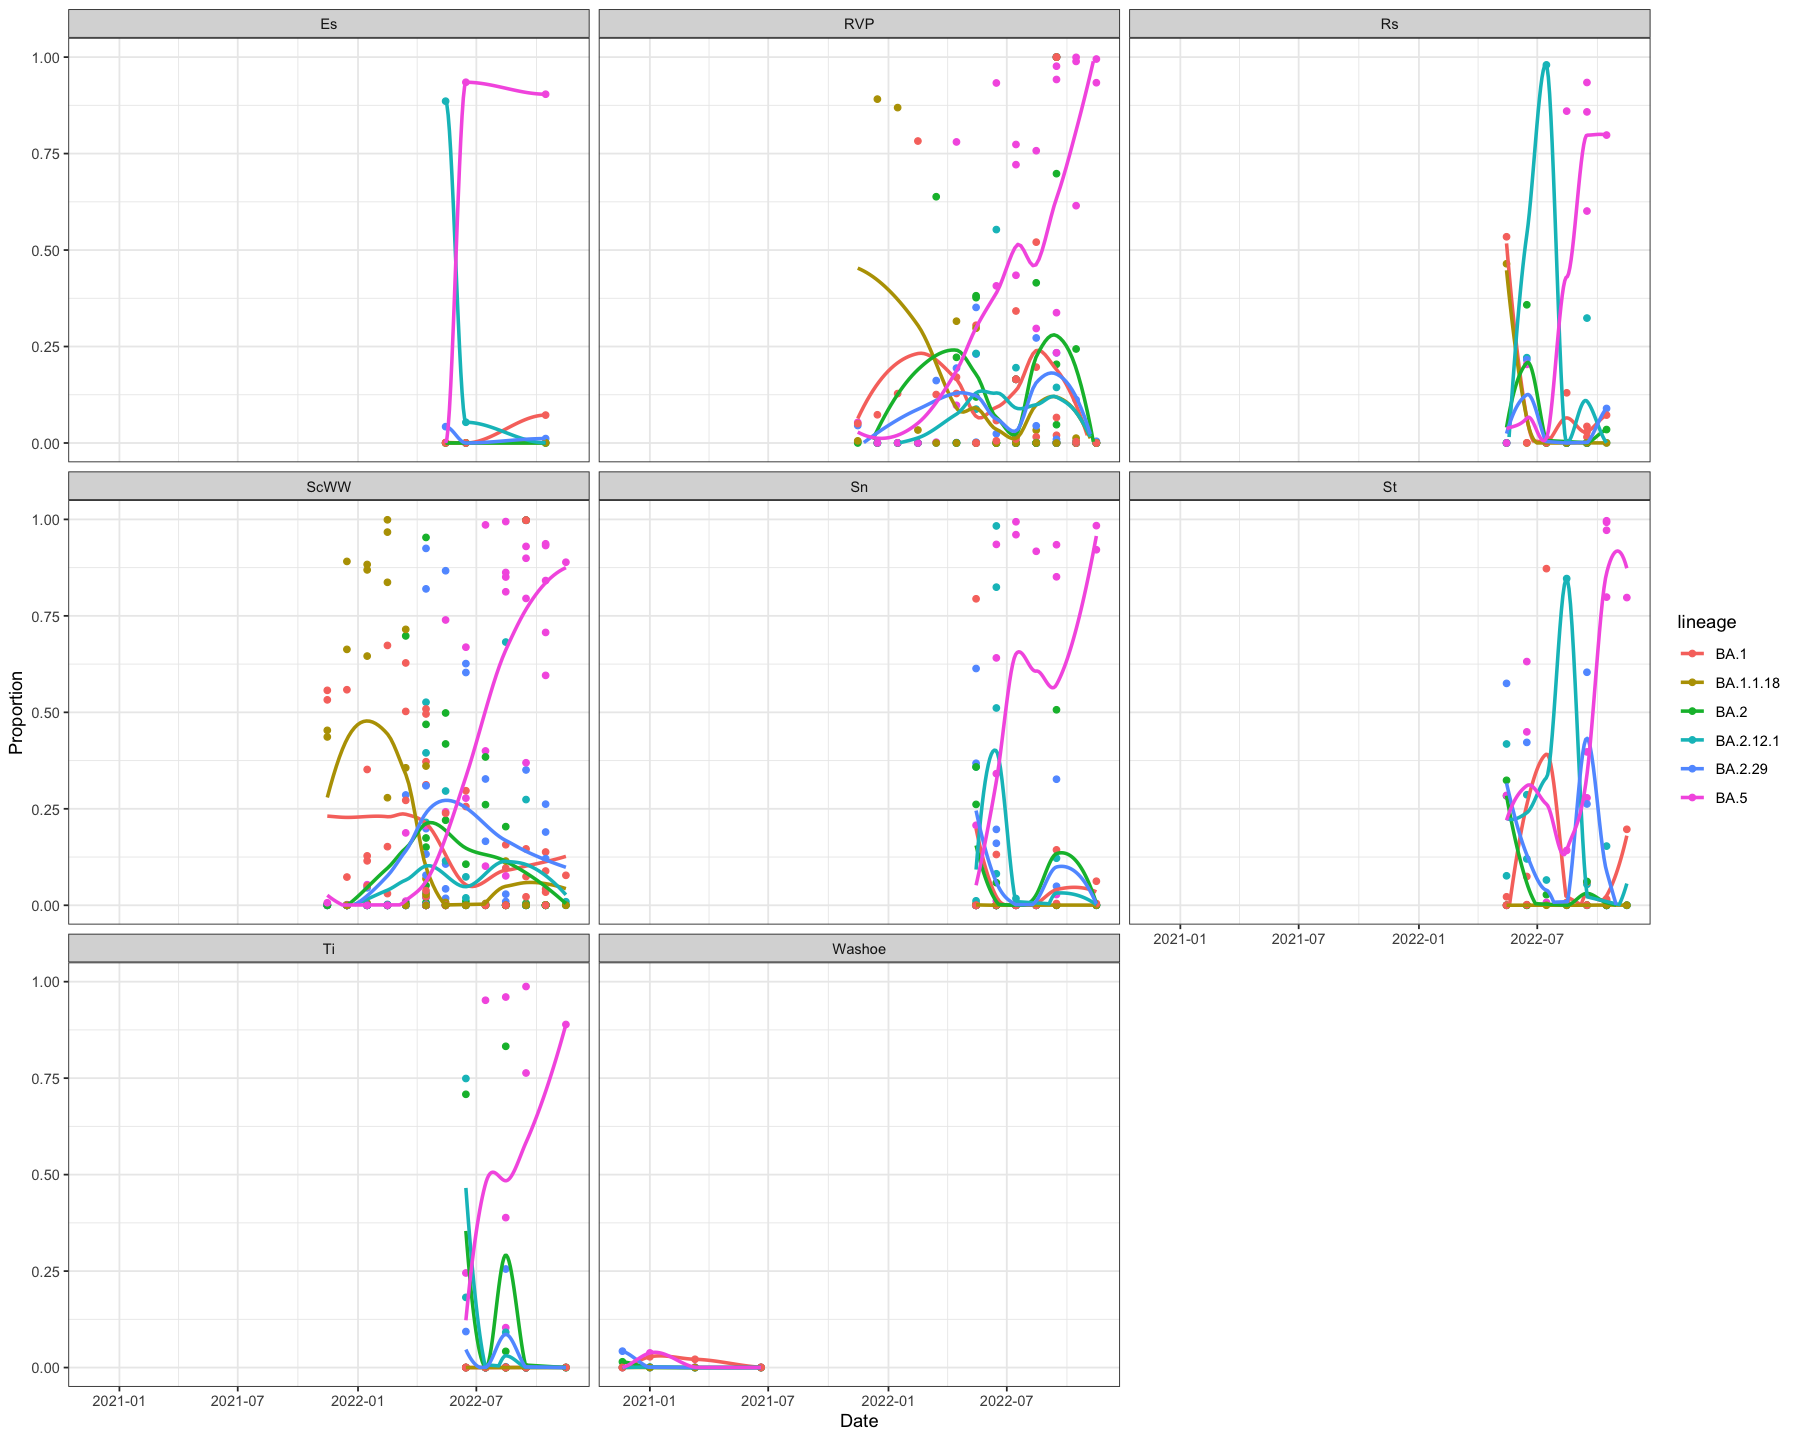

In [6]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date2 <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date2") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
